## Description
The dataset (downloaded from UCI machine learning repository88) comes from a wastewater treatment plant that uses activated sludge process to remove organic matter and suspended
solids from municipal wastewater. 

In this process (Figure A7), the suspended solids are first physically settled (primary treatment) and then biologically treated to oxidize the biodegradable organic matter (secondary treatment). 

Data from on-line sensors at different stages of the process for 40 variables over 527 days of operation are provided. Seven out of the 38 variables characterize the effluent water quality. 

<div style="text-align:center; margin-top:2rem;">

![water treatment](water-treatment.png)

</div>


## Sensor Data:

- **Influent:**

    1. DATE        (date)

    2. Q-E         (input flow to plant)

    3. ZN-E        (input Zinc to plant)

    4. PH-E        (input pH to plant)

    5. DBO-E       (input Biological demand of oxygen to plant)

    6. DQO-E       (input chemical demand of oxygen to plant)

    7. SS-E        (input suspended solids to plant)

    8. SSV-E       (input volatile supended solids to plant)

    9. SED-E       (input sediments to plant)

    10. COND-E     (input conductivity to plant)

- **Input to *Primary* Settler**

    11. PH-P       (input pH to primary settler)

    12. DBO-P      (input Biological demand of oxygen to primary settler)

    13. SS-P       (input suspended solids to primary settler)

    14. SSV-P      (input volatile supended solids to primary settler)

    15. SED-P      (input sediments to primary settler)

    16. COND-P     (input conductivity to primary settler)

- **Input to *Secondary* Settler**

    17. PH-D       (input pH to secondary settler)

    18. DBO-D      (input Biological demand of oxygen to secondary settler)

    19. DQO-D      (input chemical demand of oxygen to secondary settler)

    20. SS-D       (input suspended solids to secondary settler)

    21. SSV-D      (input volatile supended solids to secondary settler)

    22. SED-D      (input sediments to secondary settler)

    23. COND-D     (input conductivity to secondary settler)

- **Output from *Secondary* Settler (Effluent)**

    24. PH-S       (output pH)

    25. DBO-S      (output Biological demand of oxygen)

    26. DQO-S      (output chemical demand of oxygen)

    27. SS-S       (output suspended solids)

    28. SSV-S      (output volatile supended solids)

    29. SED-S      (output sediments)

    30. COND-S     (output conductivity)

- **Performance Indicators**

    31. RD-DBO-P   (performance input Biological demand of oxygen in primary settler)

    32. RD-SS-P    (performance input suspended solids to primary settler)

    33. RD-SED-P   (performance input sediments to primary settler)

    34. RD-DBO-S   (performance input Biological demand of oxygen to secondary settler)

    35. RD-DQO-S   (performance input chemical demand of oxygen to secondary settler)

    36. RD-DBO-G   (global performance input Biological demand of oxygen)

    37. RD-DQO-G   (global performance input chemical demand of oxygen)

    38. RD-SS-G    (global performance input suspended solids)

    39. RD-SED-G   (global performance input sediments)


### **Model Development for Wastewater Treatment Process**

---

### **Overview**
Model development involves building and evaluating predictive models to analyze relationships between variables and forecast outcomes. For the wastewater treatment process, regression models can predict critical output parameters such as **Output pH (\( PH\_S \))**, **Output Biological Oxygen Demand (\( BOD\_S \))**, or **Output Suspended Solids (\( SS\_S \))** based on input and intermediate parameters.

While this exercise focuses on regression models, **classification models** can also be applied. For example:
- Predicting **compliance**: Classify if effluent water quality meets regulatory standards (e.g., compliant vs. non-compliant).
- Categorizing operational states: Predict abnormal conditions based on input parameters.

---

### **Key Components of Model Development**

---

#### **1. Linear Regression**
   - **Purpose**: Understand and predict the linear relationship between input/intermediate parameters and output parameters.
   - **Examples**:
     - Predict **Output pH (\( PH\_S \))** using **Intermediate pH (\( PH\_P \))** and **Input pH (\( PH\_E \))**.
     - Analyze how changes in **Input Flow (\( Q\_E \))** affect **Output pH (\( PH\_S \))**.

---

#### **2. Non-Linear Regression**
   - **Purpose**: Capture non-linear relationships between variables, where linear regression fails to explain variance accurately.
   - **Examples**:
     - Predict **Output pH (\( PH\_S \))** using **Input Flow (\( Q\_E \))** and **Input Biological Oxygen Demand (\( BOD\_E \))**.

---

#### **3. Model Evaluation**
   - **Purpose**: Assess the performance of models using metrics like \( R^2 \), Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE).
   - **Examples**:
     - Compare the \( R^2 \) value of linear and non-linear regression models to determine which better predicts \( PH\_S \).
     - Use residual analysis to check for patterns that indicate model limitations.

---

### **How Model Development Enhances Understanding**
- **Predict Process Performance**:
  - Regression models can forecast key output parameters based on input data, supporting proactive decision-making.
- **Explore Relationships**:
  - Linear and non-linear models reveal the strength and type of dependencies between variables.
- **Optimize Treatment Efficiency**:
  - Models identify which input parameters have the most significant impact on output quality, enabling targeted process improvements.



---

## **Exercise**



In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


In [2]:
# Load the dataset
df = pd.read_csv('data.csv')

# Display the first few rows of the dataset
df.head()


,DATE,DAY-OF-WEEK,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,...,RD-DQO-G,RD-SS-G,RD-SED-G,PH-S,DBO-S,DQO-S,SS-S,SSV-S,SED-S,COND-S
0,1990-01-01,Monday,41230.0,0.35,7.6,120.0,344.0,136.0,54.4,4.5,...,71.8,87.5,99.4,7.5,16.0,97.0,17.0,51.8,0.03,903.0
1,1990-01-02,Tuesday,37386.0,1.40,7.9,165.0,470.0,170.0,76.5,4.0,...,79.4,89.4,100.0,7.6,22.0,97.0,18.0,80.6,0.00,1481.0
2,1990-01-03,Wednesday,34535.0,1.00,7.8,232.0,518.0,220.0,65.5,5.5,...,71.8,85.9,99.8,7.5,29.0,146.0,31.0,77.4,0.01,1492.0
3,1990-01-04,Thursday,32527.0,3.00,7.8,187.0,460.0,180.0,67.8,5.2,...,77.2,83.3,100.0,7.5,28.0,105.0,30.0,82.0,0.00,1590.0
4,1990-01-07,Sunday,27760.0,1.20,7.6,199.0,466.0,186.0,74.2,4.5,...,73.8,86.6,99.6,7.4,21.0,122.0,25.0,84.0,0.02,1411.0



---

### **1. Linear Regression: Predicting \( PH\_S \)**
Use **Input pH (\( PH\_E \))** and **Intermediate pH (\( PH\_P \))** to predict **Output pH (\( PH\_S \))**.

#### **Tasks**
1. Fit a **linear regression model** to predict \( PH\_S \) based on \( PH\_E \) and \( PH\_P \).
2. Compute the model’s \( R^2 \) value and interpret the result.
3. Plot the predicted vs. actual \( PH\_S \) values.



In [6]:

df.dropna(subset=['PH-S'], inplace=True)

In [7]:
df[['PH-S']].isna().sum()

PH-S    0
dtype: int64

Training set:
MSE: 0.03
RMSE: 0.17
R2: 0.15

Testing set:
MSE: 0.03
RMSE: 0.17
R2: 0.15
Training set:  (420, 2) (420, 1)
Testing set:  (106, 2) (106, 1)


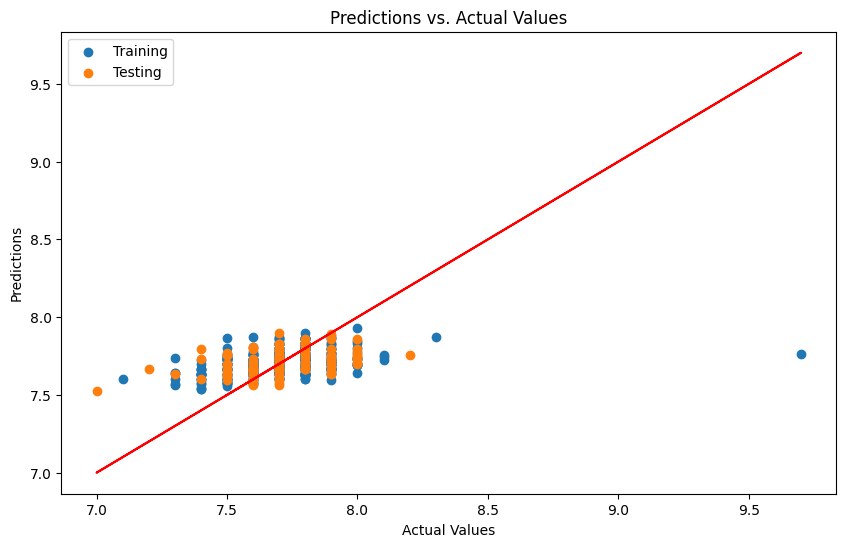

In [19]:
# TODO: Split the dataset into features (X) and target (y)
x = df[['PH-E','PH-P']]
y = df[['PH-S']]

# TODO: Fit a Linear Regression model
lr = LinearRegression()

# TODO: Make predictions and calculate R^2
# split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


lr.fit(x_train, y_train)


y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)



print('Training set:')
print('MSE: {:.2f}'.format(mean_squared_error(y_train, y_pred_train)))
print('RMSE: {:.2f}'.format(np.sqrt(mean_squared_error(y_train, y_pred_train))))
print('R2: {:.2f}'.format(r2_score(y_train, y_pred_train)))
print()
print('Testing set:')
print('MSE: {:.2f}'.format(mean_squared_error(y_test, y_pred_test)))
print('RMSE: {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred_test))))
print('R2: {:.2f}'.format(r2_score(y_test, y_pred_test)))
print('Training set: ', x_train.shape, y_train.shape)
print('Testing set: ', x_test.shape, y_test.shape)


# TODO: Plot predicted vs. actual values of PH-S
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_train, label='Training')
plt.scatter(y_test, y_pred_test, label='Testing')

# plot 45 degree line
plt.plot(y, y, color='red')

plt.title('Predictions vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.legend()
plt.show()


---

### **2. Non-Linear Regression: Predicting \( PH\_S \)**
Use **Input pH (\( PH\_E \))** and **Input Flow (\( Q\_E \))** to predict **Output pH (\( PH\_S \))**.

#### **Tasks**
1. Fit a **polynomial regression model** (degree 2) to predict \( PH\_S \) using \( PH\_E \) and \( Q\_E \).
2. Compute the model’s \( R^2 \) value and compare it to a linear model.
3. Visualize the residuals of the polynomial regression model.



Training set:
MSE: 0.03
RMSE: 0.18
R2: 0.14

Testing set:
MSE: 0.02
RMSE: 0.14
R2: -0.03


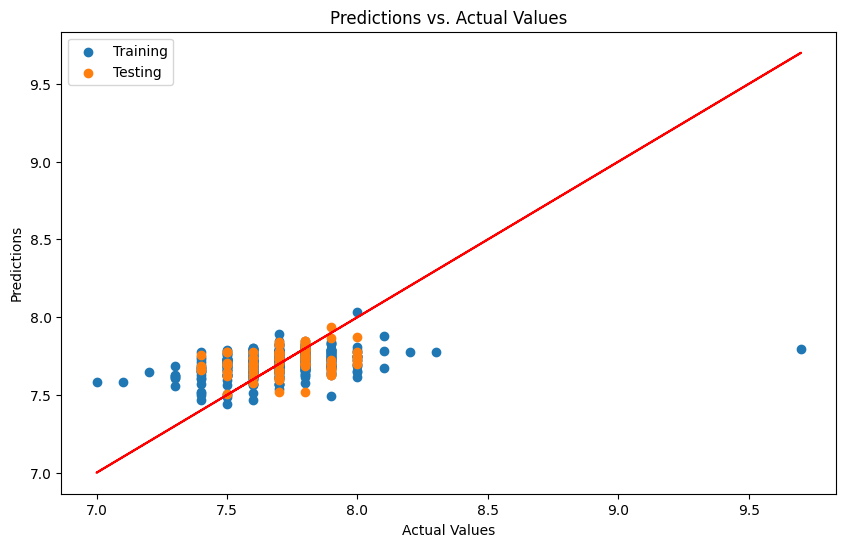

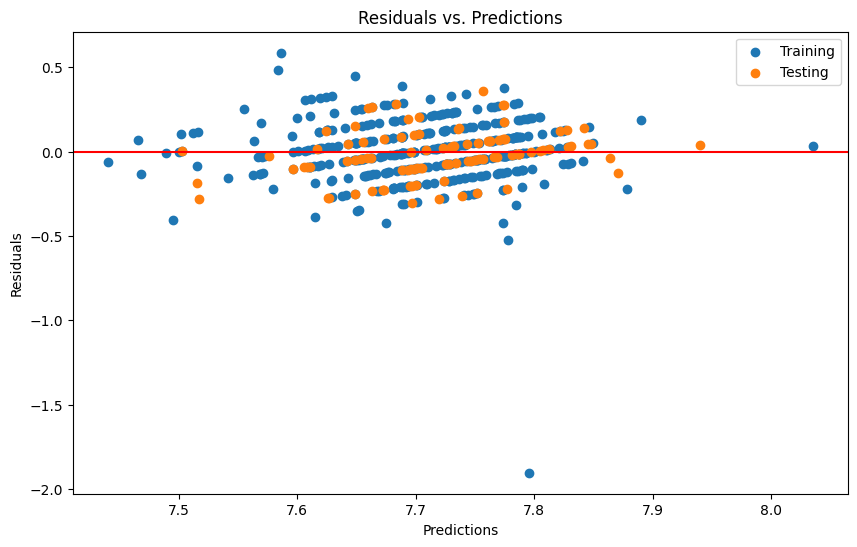

In [21]:
df.dropna(subset=['PH-S','Q-E','PH-E'], inplace=True)

x = df[['PH-E','Q-E']]
y = df[['PH-S']]



# TODO: Create polynomial features
poly = PolynomialFeatures(degree=3, include_bias=False)
x_poly = poly.fit_transform(x)

# TODO: Fit a Polynomial Regression model
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2)
lr = LinearRegression()
lr.fit(x_train, y_train)
# TODO: Make predictions and calculate R^2
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)
print('Training set:')
print('MSE: {:.2f}'.format(mean_squared_error(y_train, y_pred_train)))
print('RMSE: {:.2f}'.format(np.sqrt(mean_squared_error(y_train, y_pred_train))))
print('R2: {:.2f}'.format(r2_score(y_train, y_pred_train)))
print()
print('Testing set:')
print('MSE: {:.2f}'.format(mean_squared_error(y_test, y_pred_test)))
print('RMSE: {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred_test))))
print('R2: {:.2f}'.format(r2_score(y_test, y_pred_test)))

# TODO: Plot predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_train, label='Training')
plt.scatter(y_test, y_pred_test, label='Testing')

# plot 45 degree line
plt.plot(y, y, color='red')

plt.title('Predictions vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.legend()
plt.show()

# TODO: Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_train, y_pred_train - y_train, label='Training')
plt.scatter(y_pred_test, y_pred_test - y_test, label='Testing')

# plot 0 line
plt.axhline(y=0, color='red')

plt.title('Residuals vs. Predictions')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.legend()
plt.show()



---

### **3. Compare Model Performance**
#### **Tasks**
1. Compare the \( R^2 \) values of the linear and non-linear models. Which model performed better, and why?
2. Use the Mean Squared Error (MSE) to evaluate the prediction error of both models.



In [ ]:
# TODO: Calculate and print Mean Squared Error and R^2 for both models

#they are already calculated above




#### **Question**:
- Which model (linear or non-linear) is better for predicting \( PH\_S \), and why?



Both are weak values to choose from